# Iris Classification

## Develop a ML Model for classifying iris flowers based on their features using Python, scikit-learn, and TensorFlow.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
iris = pd.read_csv(r"Iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
X=iris[["SepalLengthCm",	"SepalWidthCm",	"PetalLengthCm",	"PetalWidthCm"]]
y=iris["Species"]

In [5]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
scaler= StandardScaler()

In [7]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [8]:
model =KNeighborsClassifier(n_neighbors=3)

In [9]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
y_pred = model.predict(X_test)

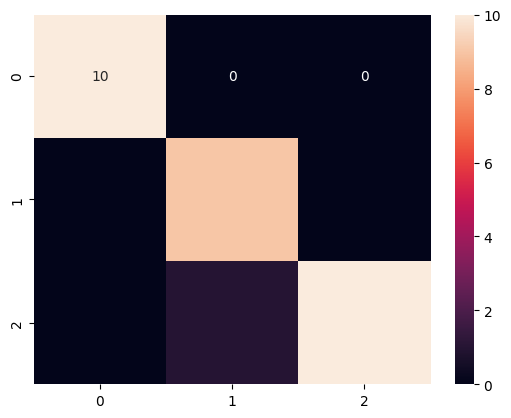

In [11]:
conf_matrix= confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix,annot=True)
plt.show()

In [12]:
print("The accuracy score : ",accuracy_score(y_test, y_pred)*100,"%")
print("report :\n",classification_report(y_test,y_pred))

The accuracy score :  96.66666666666667 %
report :
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [13]:
def predict(a,b,c,d):
    new_data = np.array([[a,b,c,d]])
    standardized = scaler.transform(new_data)
    prediction = model.predict(standardized)
    prediction = str(prediction[0]).split("-")
    print(f'Prediction: {prediction[1]}')

In [14]:
SepalLength = float(input("Enter the Sepal Lenght of the Flower in Centimeters :"))
SepalWidth	= float(input("Enter the Sepal Width of the Flower in Centimeters :"))
PetalLength	= float(input("Enter the Petal Lenght of the Flower in Centimeters :"))
PetalWidth = float(input("Enter the Petal Width of the Flower in Centimeters :"))
print("Enter the Sepal Lenght of the Flower in Centimeters :",SepalLength)
print("Enter the Sepal Width of the Flower in Centimeters :",SepalWidth)
print("Enter the Petal Lenght of the Flower in Centimeters :",PetalWidth)
print("Enter the Petal Width of the Flower in Centimeters :",PetalWidth)
predict(SepalLength,SepalWidth,PetalLength,PetalWidth)

Enter the Sepal Lenght of the Flower in Centimeters : 5.1
Enter the Sepal Width of the Flower in Centimeters : 3.5
Enter the Petal Lenght of the Flower in Centimeters : 0.2
Enter the Petal Width of the Flower in Centimeters : 0.2
Prediction: setosa
